In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import loaders

city_ref = 'sant_feliu'
bbox = [41.3752, 2.0354, 41.3889, 2.0586]

geo_graph = loaders.load_graph('sant_feliu', bbox)
pois = loaders.load_pois('sant_feliu', bbox)
centrality_df = loaders.load_centrality('sant_feliu', geo_graph)
kde_df = loaders.load_kde('sant_feliu', geo_graph, pois)

In [4]:
import pandas as pd

centrality_kde_df = pd.concat([
    pd.DataFrame({ key: value for (key, value) in zip(kde_df.columns, list(map(kde_df.__getitem__, kde_df.columns))) }),
    centrality_df], axis=1)
centrality_kde_df.head()

           amenity      shop  betweenness  closeness    degree
30267211 -1.837945 -1.837941     0.015316   0.049278  0.009288
30267212 -1.837934 -1.837929     0.006354   0.047142  0.009288
30267213 -1.837923 -1.837919     0.040893   0.047856  0.012384
30267217 -1.837930 -1.837927     0.006487   0.046772  0.012384
30267218 -1.837926 -1.837925     0.019799   0.042566  0.009288

In [5]:
centrality_kde_df.corr()

              amenity      shop  betweenness  closeness    degree
amenity      1.000000  0.985683     0.185356  -0.322450  0.070885
shop         0.985683  1.000000     0.201348  -0.269836  0.062597
betweenness  0.185356  0.201348     1.000000   0.363578  0.331055
closeness   -0.322450 -0.269836     0.363578   1.000000  0.282219
degree       0.070885  0.062597     0.331055   0.282219  1.000000

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

category_gb = pois.groupby(by=['key'])

In [8]:
%matplotlib qt
cmap = plt.get_cmap('jet')

for centrality_label in centrality_df:
    for category_label, category_ser in category_gb:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_title(centrality_label + ' vs ' + category_label)
        sns.kdeplot(category_ser['lon'], category_ser['lat'], ax=ax, legend=True, shade=True)
        geo_graph.plot(ax, node_color = [centrality_df[centrality_label][node.id] for node in geo_graph], node_size=50, cmap=cmap)

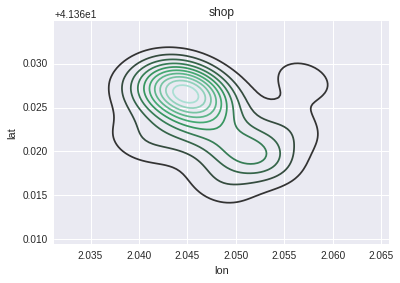

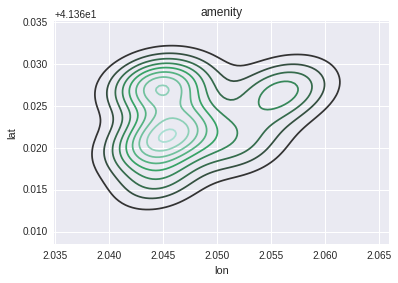

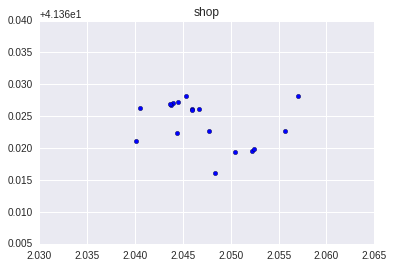

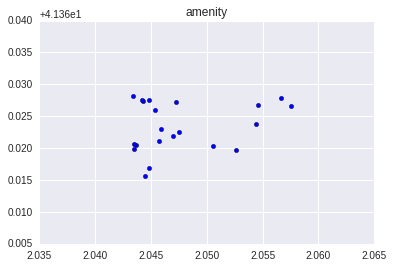

In [8]:
%matplotlib inline
for category, items in category_gb:
    fig, axes = plt.subplots()
    plt.title(category)
    plt.scatter(items['lon'], items['lat'])
    plt.show()

for category, items in category_gb:
    plt.figure()
    plt.title(category)
    sns.kdeplot(items['lon'], items['lat'])
